In [55]:
## setup and exploration
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress
import math

life = pd.read_csv('all_data.csv')

print(life.head(15))
data_types = life.dtypes
print(data_types)
life.describe(include='all')

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


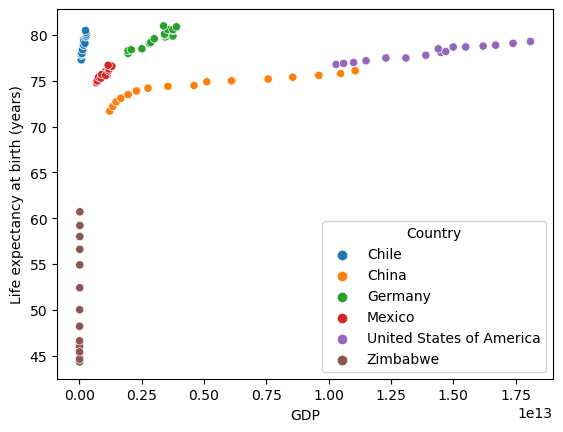

<Figure size 640x480 with 0 Axes>

In [56]:
##get a general shape of the data with a scatter plot of all countries on one plot
sns.scatterplot(data=life, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.show()
plt.clf()

In [57]:

##seperate each country manually, and plot manually
# chile = life[life['Country'] == 'Chile']
# china = life[life['Country'] == 'China']
# germany = life[life['Country'] == 'Germany']
# mexico = life[life['Country'] == 'Mexico']
# usa = life[life['Country'] == 'United States of America']
# zimbabwe = life[life['Country'] == 'Zimbabwe']

# plt.figure(figsize=(20,16))

# plt.subplot(3,3,1)
# sns.scatterplot(data = chile, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('Chile')

# plt.subplot(3,3,2)
# sns.scatterplot(data = china, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('China')

# plt.subplot(3,3,3)
# sns.scatterplot(data = germany, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('Germany')

# plt.subplot(3,3,4)
# sns.scatterplot(data = mexico, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('Mexico')

# plt.subplot(3,3,5)
# sns.scatterplot(data = usa, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('USA')

# plt.subplot(3,3,6)
# sns.scatterplot(data = zimbabwe, x='GDP', y='Life expectancy at birth (years)', hue='Year')
# plt.title('Zimbabwe')





# plt.show()
# plt.clf()



C:\Users\ahk64\AppData\Local\Temp\ipykernel_2436\3830886498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['GDP'] = current_data['GDP'].apply(lambda x: x / 100000000000)


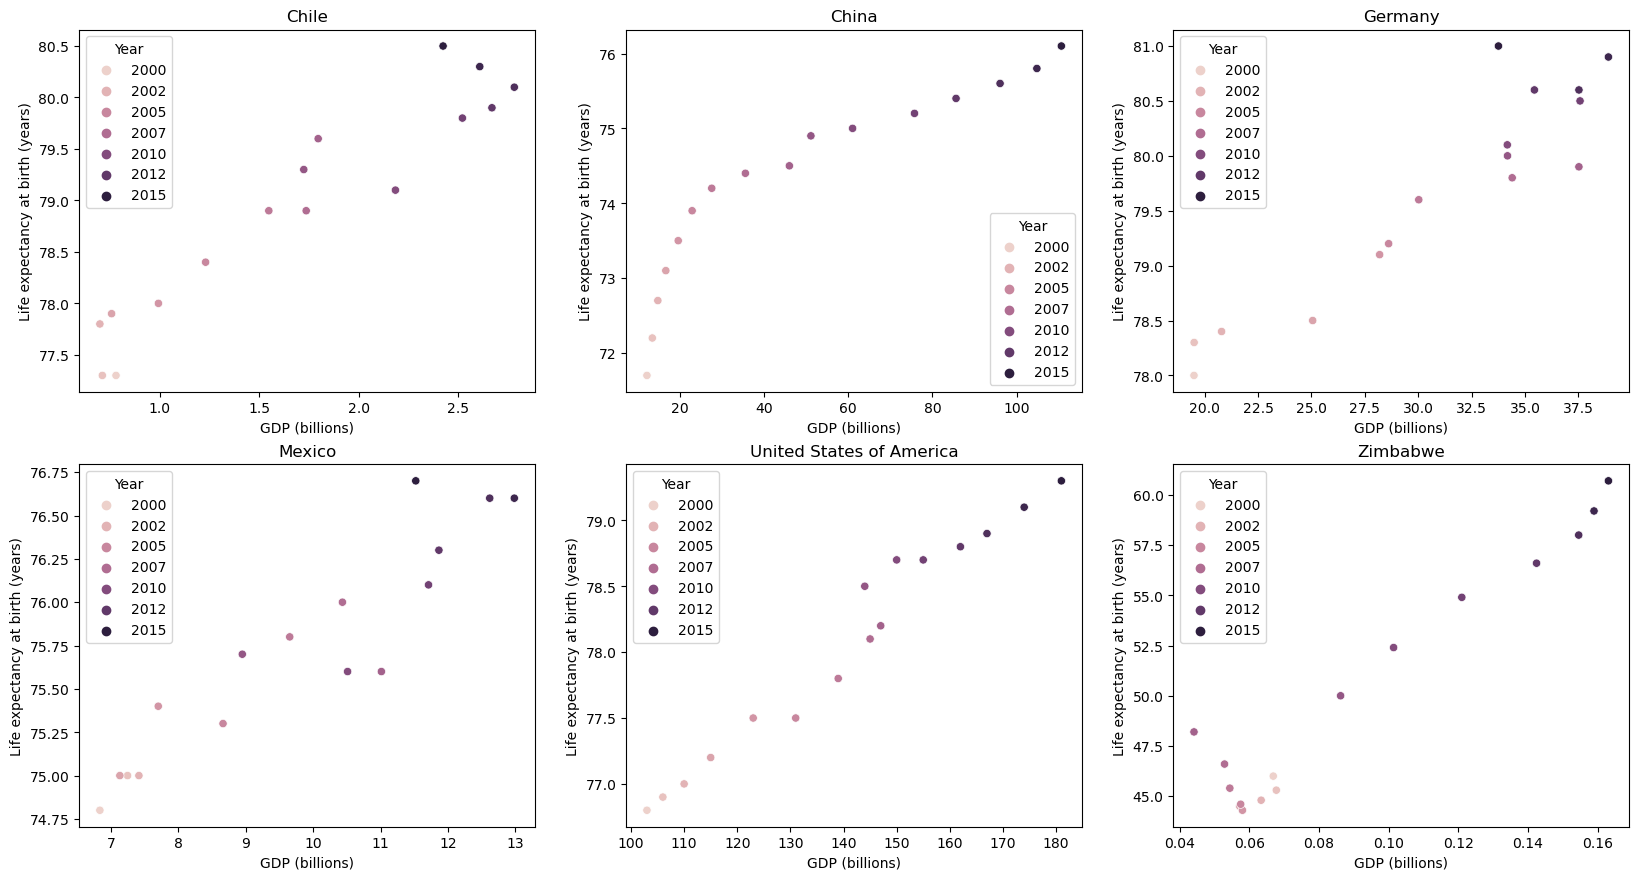

[   Country  Year  Life expectancy at birth (years)       GDP
0    Chile  2000                              77.3  0.778609
1    Chile  2001                              77.3  0.709799
2    Chile  2002                              77.8  0.697368
3    Chile  2003                              77.9  0.756435
4    Chile  2004                              78.0  0.992104
5    Chile  2005                              78.4  1.229650
6    Chile  2006                              78.9  1.547880
7    Chile  2007                              78.9  1.736060
8    Chile  2008                              79.6  1.796380
9    Chile  2009                              79.3  1.723890
10   Chile  2010                              79.1  2.185380
11   Chile  2011                              79.8  2.522520
12   Chile  2012                              79.9  2.671220
13   Chile  2013                              80.1  2.783840
14   Chile  2014                              80.3  2.609900
15   Chile  2015       

<Figure size 640x480 with 0 Axes>

In [58]:
# seperate data for each nation itertively, with conversion of GDP to Billions

countries = life['Country'].unique()
country_data = []


for country in countries:
    current_data = life[life['Country'] == country]
    current_data['GDP'] = current_data['GDP'].apply(lambda x: x / 100000000000)
    country_data.append(current_data)
    # print(current_data)

plt.figure(figsize=(20,16))
figcount = 1
country_count = 0

for country in country_data:
    plt.subplot(3,3,figcount)
    sns.scatterplot(data=country, x='GDP', y='Life expectancy at birth (years)', hue='Year')
    plt.xlabel('GDP (billions)')
    plt.title(countries[country_count])
    figcount += 1
    country_count += 1

plt.show()
plt.clf()
print(country_data)



[1.3083371929435512, 0.03420218807126802, 0.13623972458403483, 0.27623374891085567, 0.03359806240847129, 133.5298808226831]
[0.9498766659254415, 0.908525540864836, 0.932698898256127, 0.932237716784708, 0.9817092382430255, 0.9661998955858777]


<Figure size 1200x1000 with 0 Axes>

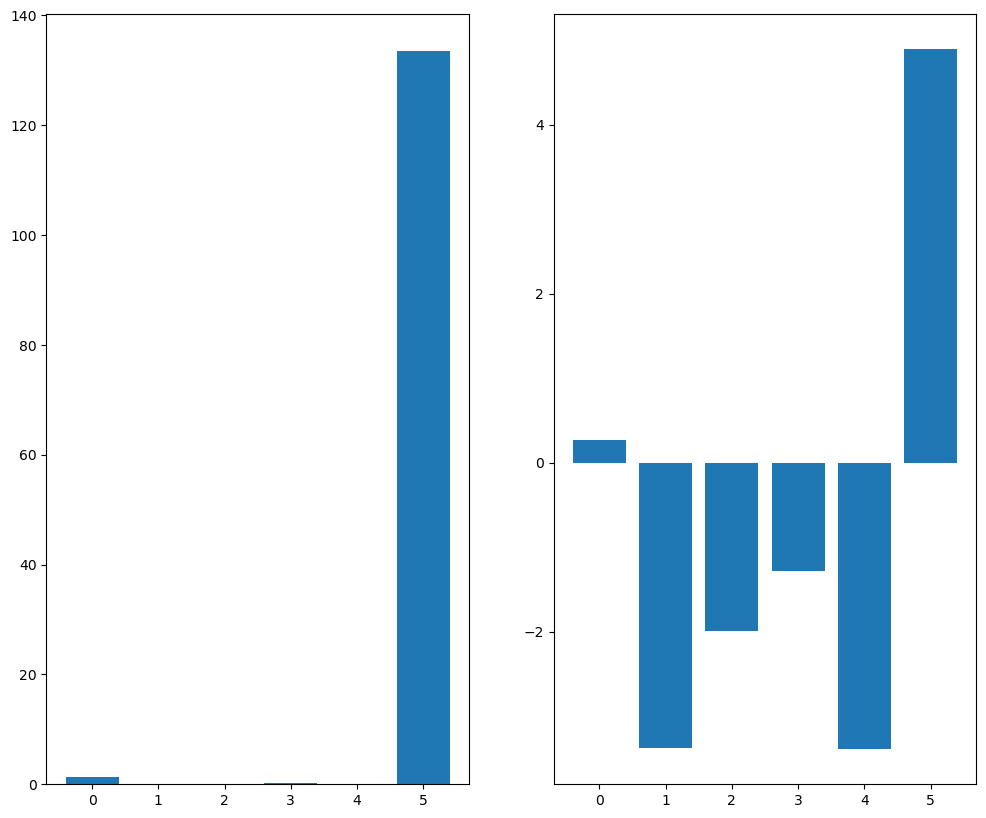

In [62]:
## calculate linear regression values for each nation

slopes = []
r_values = []
plt.figure(figsize=(12,10))


for country in country_data:
    slope, intercept, r_value, p_value, std_err = linregress(country['GDP'], country['Life expectancy at birth (years)'])
    slopes.append(slope)
    r_values.append(r_value)
print(slopes)
print(r_values)

plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.bar(range(len(countries)), slopes)
plt.subplot(1,2,2)

plt.bar(range(len(countries)), [math.log(slope) for slope in slopes])


plt.show()
